# IMDB DATA ANALYSIS 2006-2016

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as ply
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot
import missingno



In [2]:
df = pd.read_csv("/kaggle/input/imdb-data/IMDB-Movie-Data.csv")
movie = df.copy()

In [3]:
movie.head()

Rank                    Title                     Genre  \
0     1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1     2               Prometheus  Adventure,Mystery,Sci-Fi   
2     3                    Split           Horror,Thriller   
3     4                     Sing   Animation,Comedy,Family   
4     5            Suicide Squad  Action,Adventure,Fantasy   

                                         Description              Director  \
0  A group of intergalactic criminals are forced ...            James Gunn   
1  Following clues to the origin of mankind, a te...          Ridley Scott   
2  Three girls are kidnapped by a man with a diag...    M. Night Shyamalan   
3  In a city of humanoid animals, a hustling thea...  Christophe Lourdelet   
4  A secret government agency recruits some of th...            David Ayer   

                                              Actors  Year  Runtime (Minutes)  \
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014                121   
1  Noomi Rapace, Logan Marshall-Green, Michael Fa...  2012                124   
2  James McAvoy, Anya Taylor-Joy, Haley Lu Richar...  2016                117   
3  Matthew McConaughey,Reese Witherspoon, Seth Ma...  2016                108   
4  Will Smith, Jared Leto, Margot Robbie, Viola D...  2016                123   

   Rating   Votes  Revenue (Millions)  Metascore  
0     8.1  757074              333.13       76.0  
1     7.0  485820              126.46       65.0  
2     7.3  157606              138.12       62.0  
3     7.2   60545              270.32       59.0  
4     6.2  393727              325.02       40.0

In [4]:
movie = movie.set_index(movie.Title)
movie.head()

Rank                    Title  \
Title                                                    
Guardians of the Galaxy     1  Guardians of the Galaxy   
Prometheus                  2               Prometheus   
Split                       3                    Split   
Sing                        4                     Sing   
Suicide Squad               5            Suicide Squad   

                                            Genre  \
Title                                               
Guardians of the Galaxy   Action,Adventure,Sci-Fi   
Prometheus               Adventure,Mystery,Sci-Fi   
Split                             Horror,Thriller   
Sing                      Animation,Comedy,Family   
Suicide Squad            Action,Adventure,Fantasy   

                                                               Description  \
Title                                                                        
Guardians of the Galaxy  A group of intergalactic criminals are forced ...   
Prometheus               Following clues to the origin of mankind, a te...   
Split                    Three girls are kidnapped by a man with a diag...   
Sing                     In a city of humanoid animals, a hustling thea...   
Suicide Squad            A secret government agency recruits some of th...   

                                     Director  \
Title                                           
Guardians of the Galaxy            James Gunn   
Prometheus                       Ridley Scott   
Split                      M. Night Shyamalan   
Sing                     Christophe Lourdelet   
Suicide Squad                      David Ayer   

                                                                    Actors  \
Title                                                                        
Guardians of the Galaxy  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...   
Prometheus               Noomi Rapace, Logan Marshall-Green, Michael Fa...   
Split                    James McAvoy, Anya Taylor-Joy, Haley Lu Richar...   
Sing                     Matthew McConaughey,Reese Witherspoon, Seth Ma...   
Suicide Squad            Will Smith, Jared Leto, Margot Robbie, Viola D...   

                         Year  Runtime (Minutes)  Rating   Votes  \
Title                                                              
Guardians of the Galaxy  2014                121     8.1  757074   
Prometheus               2012                124     7.0  485820   
Split                    2016                117     7.3  157606   
Sing                     2016                108     7.2   60545   
Suicide Squad            2016                123     6.2  393727   

                         Revenue (Millions)  Metascore  
Title                                                   
Guardians of the Galaxy              333.13       76.0  
Prometheus                           126.46       65.0  
Split                                138.12       62.0  
Sing                                 270.32       59.0  
Suicide Squad                        325.02       40.0

In [5]:
movie.drop(columns="Title",axis=1,inplace=True)

In [6]:
movie.head()

Rank                     Genre  \
Title                                                     
Guardians of the Galaxy     1   Action,Adventure,Sci-Fi   
Prometheus                  2  Adventure,Mystery,Sci-Fi   
Split                       3           Horror,Thriller   
Sing                        4   Animation,Comedy,Family   
Suicide Squad               5  Action,Adventure,Fantasy   

                                                               Description  \
Title                                                                        
Guardians of the Galaxy  A group of intergalactic criminals are forced ...   
Prometheus               Following clues to the origin of mankind, a te...   
Split                    Three girls are kidnapped by a man with a diag...   
Sing                     In a city of humanoid animals, a hustling thea...   
Suicide Squad            A secret government agency recruits some of th...   

                                     Director  \
Title                                           
Guardians of the Galaxy            James Gunn   
Prometheus                       Ridley Scott   
Split                      M. Night Shyamalan   
Sing                     Christophe Lourdelet   
Suicide Squad                      David Ayer   

                                                                    Actors  \
Title                                                                        
Guardians of the Galaxy  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...   
Prometheus               Noomi Rapace, Logan Marshall-Green, Michael Fa...   
Split                    James McAvoy, Anya Taylor-Joy, Haley Lu Richar...   
Sing                     Matthew McConaughey,Reese Witherspoon, Seth Ma...   
Suicide Squad            Will Smith, Jared Leto, Margot Robbie, Viola D...   

                         Year  Runtime (Minutes)  Rating   Votes  \
Title                                                              
Guardians of the Galaxy  2014                121     8.1  757074   
Prometheus               2012                124     7.0  485820   
Split                    2016                117     7.3  157606   
Sing                     2016                108     7.2   60545   
Suicide Squad            2016                123     6.2  393727   

                         Revenue (Millions)  Metascore  
Title                                                   
Guardians of the Galaxy              333.13       76.0  
Prometheus                           126.46       65.0  
Split                                138.12       62.0  
Sing                                 270.32       59.0  
Suicide Squad                        325.02       40.0

In [7]:
movie.rename(columns={"Description":"Desc.",'Revenue (Millions)':"Revenue"},inplace=True)
movie.head()

Rank                     Genre  \
Title                                                     
Guardians of the Galaxy     1   Action,Adventure,Sci-Fi   
Prometheus                  2  Adventure,Mystery,Sci-Fi   
Split                       3           Horror,Thriller   
Sing                        4   Animation,Comedy,Family   
Suicide Squad               5  Action,Adventure,Fantasy   

                                                                     Desc.  \
Title                                                                        
Guardians of the Galaxy  A group of intergalactic criminals are forced ...   
Prometheus               Following clues to the origin of mankind, a te...   
Split                    Three girls are kidnapped by a man with a diag...   
Sing                     In a city of humanoid animals, a hustling thea...   
Suicide Squad            A secret government agency recruits some of th...   

                                     Director  \
Title                                           
Guardians of the Galaxy            James Gunn   
Prometheus                       Ridley Scott   
Split                      M. Night Shyamalan   
Sing                     Christophe Lourdelet   
Suicide Squad                      David Ayer   

                                                                    Actors  \
Title                                                                        
Guardians of the Galaxy  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...   
Prometheus               Noomi Rapace, Logan Marshall-Green, Michael Fa...   
Split                    James McAvoy, Anya Taylor-Joy, Haley Lu Richar...   
Sing                     Matthew McConaughey,Reese Witherspoon, Seth Ma...   
Suicide Squad            Will Smith, Jared Leto, Margot Robbie, Viola D...   

                         Year  Runtime (Minutes)  Rating   Votes  Revenue  \
Title                                                                       
Guardians of the Galaxy  2014                121     8.1  757074   333.13   
Prometheus               2012                124     7.0  485820   126.46   
Split                    2016                117     7.3  157606   138.12   
Sing                     2016                108     7.2   60545   270.32   
Suicide Squad            2016                123     6.2  393727   325.02   

                         Metascore  
Title                               
Guardians of the Galaxy       76.0  
Prometheus                    65.0  
Split                         62.0  
Sing                          59.0  
Suicide Squad                 40.0

In [8]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, Guardians of the Galaxy to Nine Lives
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rank               1000 non-null   int64  
 1   Genre              1000 non-null   object 
 2   Desc.              1000 non-null   object 
 3   Director           1000 non-null   object 
 4   Actors             1000 non-null   object 
 5   Year               1000 non-null   int64  
 6   Runtime (Minutes)  1000 non-null   int64  
 7   Rating             1000 non-null   float64
 8   Votes              1000 non-null   int64  
 9   Revenue            872 non-null    float64
 10  Metascore          936 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 93.8+ KB


In [9]:
movie.isnull().sum()

Rank                   0
Genre                  0
Desc.                  0
Director               0
Actors                 0
Year                   0
Runtime (Minutes)      0
Rating                 0
Votes                  0
Revenue              128
Metascore             64
dtype: int64

In [10]:
movie[movie.isnull().any(axis=1)]

Rank                    Genre  \
Title                                                    
Mindhorn                    8                   Comedy   
Hounds of Love             23       Crime,Drama,Horror   
Paris pieds nus            26                   Comedy   
Bahubali: The Beginning    27   Action,Adventure,Drama   
Dead Awake                 28          Horror,Thriller   
...                       ...                      ...   
Martyrs                   989                   Horror   
Selma                     990  Biography,Drama,History   
Take Me Home Tonight      993     Comedy,Drama,Romance   
Secret in Their Eyes      996      Crime,Drama,Mystery   
Search Party              999         Adventure,Comedy   

                                                                     Desc.  \
Title                                                                        
Mindhorn                 A has-been actor best known for playing the ti...   
Hounds of Love           A cold-blooded predatory couple while cruising...   
Paris pieds nus          Fiona visits Paris for the first time to assis...   
Bahubali: The Beginning  In ancient India, an adventurous and daring ma...   
Dead Awake               A young woman must save herself and her friend...   
...                                                                    ...   
Martyrs                  A young woman's quest for revenge against the ...   
Selma                    A chronicle of Martin Luther King's campaign t...   
Take Me Home Tonight     Four years after graduation, an awkward high s...   
Secret in Their Eyes     A tight-knit team of rising investigators, alo...   
Search Party             A pair of friends embark on a mission to reuni...   

                               Director  \
Title                                     
Mindhorn                     Sean Foley   
Hounds of Love                Ben Young   
Paris pieds nus          Dominique Abel   
Bahubali: The Beginning  S.S. Rajamouli   
Dead Awake               Phillip Guzman   
...                                 ...   
Martyrs                  Pascal Laugier   
Selma                      Ava DuVernay   
Take Me Home Tonight      Michael Dowse   
Secret in Their Eyes          Billy Ray   
Search Party             Scot Armstrong   

                                                                    Actors  \
Title                                                                        
Mindhorn                 Essie Davis, Andrea Riseborough, Julian Barrat...   
Hounds of Love           Emma Booth, Ashleigh Cummings, Stephen Curry,S...   
Paris pieds nus          Fiona Gordon, Dominique Abel,Emmanuelle Riva, ...   
Bahubali: The Beginning  Prabhas, Rana Daggubati, Anushka Shetty,Tamann...   
Dead Awake               Jocelin Donahue, Jesse Bradford, Jesse Borrego...   
...                                                                    ...   
Martyrs                  Morjana Alaoui, Mylène Jampanoï, Catherine Bég...   
Selma                    David Oyelowo, Carmen Ejogo, Tim Roth, Lorrain...   
Take Me Home Tonight     Topher Grace, Anna Faris, Dan Fogler, Teresa P...   
Secret in Their Eyes     Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...   
Search Party             Adam Pally, T.J. Miller, Thomas Middleditch,Sh...   

                         Year  Runtime (Minutes)  Rating  Votes  Revenue  \
Title                                                                      
Mindhorn                 2016                 89     6.4   2490      NaN   
Hounds of Love           2016                108     6.7   1115      NaN   
Paris pieds nus          2016                 83     6.8    222      NaN   
Bahubali: The Beginning  2015                159     8.3  76193     6.50   
Dead Awake               2016                 99     4.7    523     0.01   
...                       ...                ...     ...    ...      ...   
Martyrs                  2008                 99     7.1  63785      NaN

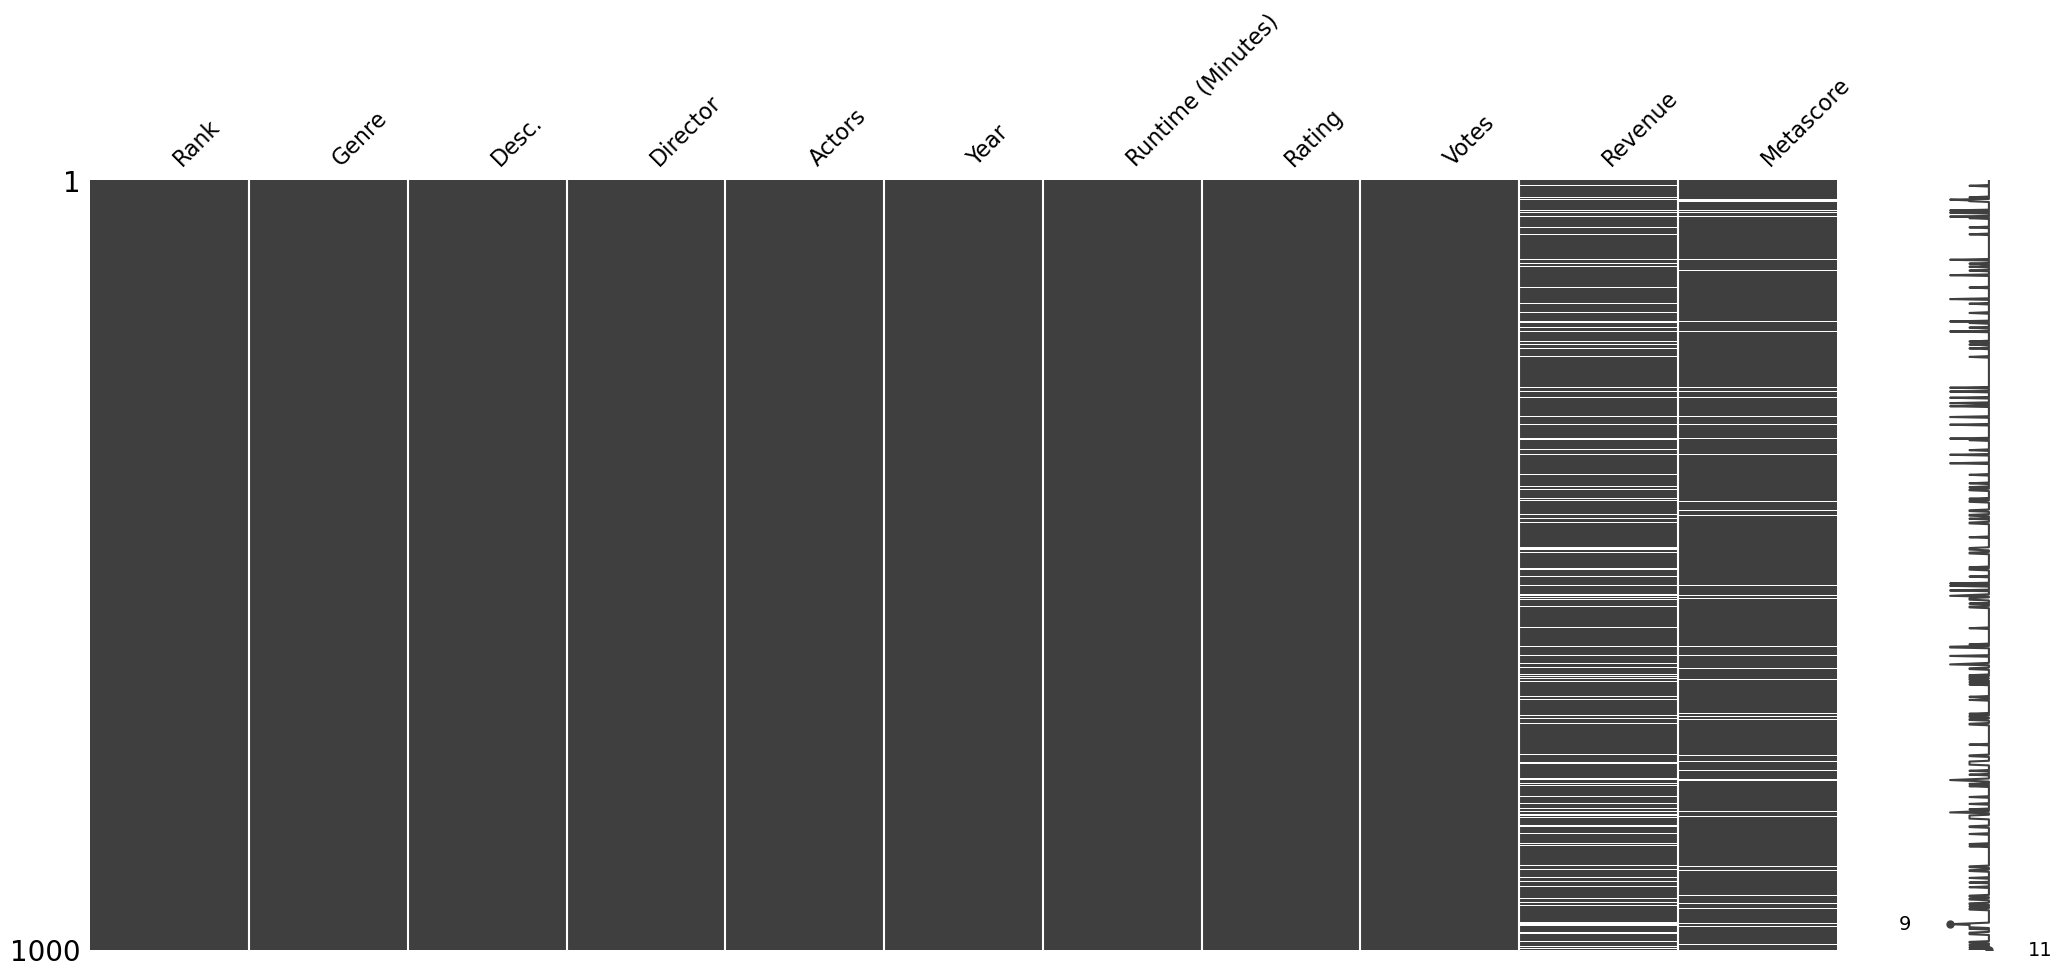

In [11]:
missingno.matrix(movie);

In [12]:
len(movie.Metascore.unique())

85

In [13]:
len(set(movie.Metascore.values)) 
#set her bir nan i ayri bir deger olarak aldi nan lari birbiri ile kiyaslayamadigi icin


148

In [14]:
[i for i in set(movie.Metascore.values) if i not in movie.Metascore.unique()]
#burda nan disinda baska bir missing niteligi tasiyan deger olmadigini anladik

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [15]:
movie.shape

(1000, 11)

In [16]:
movie[movie["Metascore"].isnull()].index

Index(['Paris pieds nus', 'Bahubali: The Beginning', 'Dead Awake', '5- 25- 77',
       'Don't Fuck in the Woods', 'Fallen', 'Contratiempo', 'Dangal',
       'Boyka: Undisputed IV', 'Twin Peaks: The Missing Pieces', 'Realive',
       'Hacker', 'Satanic', 'Ballerina', 'Death Proof', 'Iris',
       'The Exception', 'Vincent N Roxxy', 'The Stakelander', 'Before I Wake',
       'Demain tout commence', 'American Wrestler: The Wizard', 'Bronson',
       'Atonement', 'The Purge: Election Year', 'Filth', 'Silent Hill',
       'Angry Birds', 'Whiskey Tango Foxtrot', 'Elysium', 'Deja Vu',
       'American Pastoral', 'P.S. I Love You', 'Handsome Devil',
       'Winter's Bone', 'Free State of Jones', 'The Whole Truth', 'WALL·E',
       'Gran Torino', 'Sleeping Beauty', 'Genius', '10 Years', 'Funny Games',
       'The Adjustment Bureau', 'Rules Don't Apply', 'The Road',
       'Conan the Barbarian', 'Ender's Game', 'Chalk It Up',
       'The Man Who Knew Infinity', 'Suite Française', 'Shut In', 'Gri

In [17]:
movie.drop(movie[movie["Metascore"].isnull()].index,inplace=True)

In [18]:
movie.shape

(936, 11)

In [19]:
movie

Rank                     Genre  \
Title                                                     
Guardians of the Galaxy     1   Action,Adventure,Sci-Fi   
Prometheus                  2  Adventure,Mystery,Sci-Fi   
Split                       3           Horror,Thriller   
Sing                        4   Animation,Comedy,Family   
Suicide Squad               5  Action,Adventure,Fantasy   
...                       ...                       ...   
Secret in Their Eyes      996       Crime,Drama,Mystery   
Hostel: Part II           997                    Horror   
Step Up 2: The Streets    998       Drama,Music,Romance   
Search Party              999          Adventure,Comedy   
Nine Lives               1000     Comedy,Family,Fantasy   

                                                                     Desc.  \
Title                                                                        
Guardians of the Galaxy  A group of intergalactic criminals are forced ...   
Prometheus               Following clues to the origin of mankind, a te...   
Split                    Three girls are kidnapped by a man with a diag...   
Sing                     In a city of humanoid animals, a hustling thea...   
Suicide Squad            A secret government agency recruits some of th...   
...                                                                    ...   
Secret in Their Eyes     A tight-knit team of rising investigators, alo...   
Hostel: Part II          Three American college students studying abroa...   
Step Up 2: The Streets   Romantic sparks occur between two dance studen...   
Search Party             A pair of friends embark on a mission to reuni...   
Nine Lives               A stuffy businessman finds himself trapped ins...   

                                     Director  \
Title                                           
Guardians of the Galaxy            James Gunn   
Prometheus                       Ridley Scott   
Split                      M. Night Shyamalan   
Sing                     Christophe Lourdelet   
Suicide Squad                      David Ayer   
...                                       ...   
Secret in Their Eyes                Billy Ray   
Hostel: Part II                      Eli Roth   
Step Up 2: The Streets             Jon M. Chu   
Search Party                   Scot Armstrong   
Nine Lives                   Barry Sonnenfeld   

                                                                    Actors  \
Title                                                                        
Guardians of the Galaxy  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...   
Prometheus               Noomi Rapace, Logan Marshall-Green, Michael Fa...   
Split                    James McAvoy, Anya Taylor-Joy, Haley Lu Richar...   
Sing                     Matthew McConaughey,Reese Witherspoon, Seth Ma...   
Suicide Squad            Will Smith, Jared Leto, Margot Robbie, Viola D...   
...                                                                    ...   
Secret in Their Eyes     Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...   
Hostel: Part II          Lauren German, Heather Matarazzo, Bijou Philli...   
Step Up 2: The Streets   Robert Hoffman, Briana Evigan, Cassie Ventura,...   
Search Party             Adam Pally, T.J. Miller, Thomas Middleditch,Sh...   
Nine Lives               Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...   

                         Year  Runtime (Minutes)  Rating   Votes  Revenue  \
Title                                                                       
Guardians of the Galaxy  2014                121     8.1  757074   333.13   
Prometheus               2012                124     7.0  485820   126.46   
Split                    2016                117     7.3  157606   138.12   
Sing                     2016                108     7.2   60545   270.32   
Suicide Squad            2016                123     6.2  393727   325.02   
...                       ...                ...  

In [20]:
movie.shape

(936, 11)

In [21]:
movie.Revenue.isnull()

Title
Guardians of the Galaxy    False
Prometheus                 False
Split                      False
Sing                       False
Suicide Squad              False
                           ...  
Secret in Their Eyes        True
Hostel: Part II            False
Step Up 2: The Streets     False
Search Party                True
Nine Lives                 False
Name: Revenue, Length: 936, dtype: bool

In [22]:
len(movie.Revenue.unique())

790

In [23]:
[i for i in set(movie.Revenue.values) if i not in movie.Revenue.unique()]

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [24]:
movie.shape

(936, 11)

In [25]:
movie[movie["Revenue"].isnull()].index

Index(['Mindhorn', 'Hounds of Love', 'The Last Face',
       'The Autopsy of Jane Doe', 'The Promise', 'All We Had', 'The Bad Batch',
       'Brimstone', 'Mine', 'Beyond the Gates', 'Love', 'Below Her Mouth',
       'The Girl with All the Gifts', 'Old Boy', 'A Dark Song', 'Rupture',
       'Tracktown', 'Lady Macbeth', 'Hush', 'Whisky Galore',
       'Absolutely Anything', 'The Black Room', 'Elle',
       'The Headhunter's Calling', 'Srpski film', 'Let Me Make You a Martyr',
       'Folk Hero & Funny Guy', 'The Thinning', 'Predestination', 'Pet',
       'Paint It Black', 'Macbeth', 'Perfetti sconosciuti', 'Imperium',
       'Mr. Nobody', 'City of Tiny Lights', 'Magic Mike XXL', 'True Crimes',
       'Spectral', 'Zipper', 'I, Daniel Blake', 'The Survivalist', 'Colonia',
       'The Last Airbender', 'He's Just Not That Into You', 'The Escort',
       'Megan Is Missing', 'The Ridiculous 6', 'Viral', 'Tall Men', 'Solace',
       'The Levelling', 'Devil's Knot', 'War on Everyone',
       'Ha

In [26]:
movie.shape

(936, 11)

In [27]:
len(movie.Revenue.unique())

790

In [28]:
len(set(movie.Revenue))

887

In [29]:
movie.Revenue.mean()

84.56455847255368

In [30]:
movie['Revenue'].fillna(movie.Revenue.mean(),inplace=True)

In [31]:
movie.shape

(936, 11)

In [32]:
len(movie.Revenue.unique())

790

In [33]:
len(set(movie.Revenue))

790

In [34]:
movie.isnull().sum()

Rank                 0
Genre                0
Desc.                0
Director             0
Actors               0
Year                 0
Runtime (Minutes)    0
Rating               0
Votes                0
Revenue              0
Metascore            0
dtype: int64

In [35]:
top_250=movie.sort_values(by='Rating',ascending=False).head(250)
top_250

Rank                      Genre  \
Title                                                                 
The Dark Knight                       55         Action,Crime,Drama   
Inception                             81    Action,Adventure,Sci-Fi   
Interstellar                          37     Adventure,Drama,Sci-Fi   
The Intouchables                     250     Biography,Comedy,Drama   
Kimi no na wa                         97    Animation,Drama,Fantasy   
...                                  ...                        ...   
Patriots Day                          67     Drama,History,Thriller   
Me Before You                         58              Drama,Romance   
Mission: Impossible - Rogue Nation   234  Action,Adventure,Thriller   
Blue Valentine                       444              Drama,Romance   
I Origins                            698       Drama,Romance,Sci-Fi   

                                                                                Desc.  \
Title                                                                                   
The Dark Knight                     When the menace known as the Joker wreaks havo...   
Inception                           A thief, who steals corporate secrets through ...   
Interstellar                        A team of explorers travel through a wormhole ...   
The Intouchables                    After he becomes a quadriplegic from a paragli...   
Kimi no na wa                       Two strangers find themselves linked in a biza...   
...                                                                               ...   
Patriots Day                        The story of the 2013 Boston Marathon bombing ...   
Me Before You                       A girl in a small town forms an unlikely bond ...   
Mission: Impossible - Rogue Nation  Ethan and team take on their most impossible m...   
Blue Valentine                      The relationship of a contemporary married cou...   
I Origins                           A molecular biologist and his laboratory partn...   

                                                 Director  \
Title                                                       
The Dark Knight                         Christopher Nolan   
Inception                               Christopher Nolan   
Interstellar                            Christopher Nolan   
The Intouchables                          Olivier Nakache   
Kimi no na wa                              Makoto Shinkai   
...                                                   ...   
Patriots Day                                   Peter Berg   
Me Before You                               Thea Sharrock   
Mission: Impossible - Rogue Nation  Christopher McQuarrie   
Blue Valentine                           Derek Cianfrance   
I Origins                                     Mike Cahill   

                                                                               Actors  \
Title                                                                                   
The Dark Knight                     Christian Bale, Heath Ledger, Aaron Eckhart,Mi...   
Inception                           Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...   
Interstellar                        Matthew McConaughey, Anne Hathaway, Jessica Ch...   
The Intouchables                    François Cluzet, Omar Sy, Anne Le Ny, Audrey F...   
Kimi no na wa                       Ryûnosuke Kamiki, Mone Kamishiraishi, Ryô Nari...   
...                                                                               ...   
Patriots Day                        Mark Wahlberg, Michelle Monaghan, J.K. Simmons...   
Me Before You                       Emilia Clarke, Sam Claflin, Janet McTeer, Char...   
Mission: Impossible - Rogue Nation  Tom Cruise, Rebecca Ferguson, Jeremy Renner, S...   
Blue Valentine                      Ryan Gosling, Michelle Williams, John Doman,Fa...   
I Origins                           Michael Pitt, Steven Yeun, Astrid Bergès-Frisb...   

  

In [36]:
top_250.to_csv('/kaggle/working/top_250.csv')#top 250 movie

In [37]:
df_top_250=pd.read_csv("top_250.csv")
df_top_250

Title  Rank                      Genre  \
0                       The Dark Knight    55         Action,Crime,Drama   
1                             Inception    81    Action,Adventure,Sci-Fi   
2                          Interstellar    37     Adventure,Drama,Sci-Fi   
3                      The Intouchables   250     Biography,Comedy,Drama   
4                         Kimi no na wa    97    Animation,Drama,Fantasy   
..                                  ...   ...                        ...   
245                        Patriots Day    67     Drama,History,Thriller   
246                       Me Before You    58              Drama,Romance   
247  Mission: Impossible - Rogue Nation   234  Action,Adventure,Thriller   
248                      Blue Valentine   444              Drama,Romance   
249                           I Origins   698       Drama,Romance,Sci-Fi   

                                                 Desc.               Director  \
0    When the menace known as the Joker wreaks havo...      Christopher Nolan   
1    A thief, who steals corporate secrets through ...      Christopher Nolan   
2    A team of explorers travel through a wormhole ...      Christopher Nolan   
3    After he becomes a quadriplegic from a paragli...        Olivier Nakache   
4    Two strangers find themselves linked in a biza...         Makoto Shinkai   
..                                                 ...                    ...   
245  The story of the 2013 Boston Marathon bombing ...             Peter Berg   
246  A girl in a small town forms an unlikely bond ...          Thea Sharrock   
247  Ethan and team take on their most impossible m...  Christopher McQuarrie   
248  The relationship of a contemporary married cou...       Derek Cianfrance   
249  A molecular biologist and his laboratory partn...            Mike Cahill   

                                                Actors  Year  \
0    Christian Bale, Heath Ledger, Aaron Eckhart,Mi...  2008   
1    Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...  2010   
2    Matthew McConaughey, Anne Hathaway, Jessica Ch...  2014   
3    François Cluzet, Omar Sy, Anne Le Ny, Audrey F...  2011   
4    Ryûnosuke Kamiki, Mone Kamishiraishi, Ryô Nari...  2016   
..                                                 ...   ...   
245  Mark Wahlberg, Michelle Monaghan, J.K. Simmons...  2016   
246  Emilia Clarke, Sam Claflin, Janet McTeer, Char...  2016   
247  Tom Cruise, Rebecca Ferguson, Jeremy Renner, S...  2015   
248  Ryan Gosling, Michelle Williams, John Doman,Fa...  2010   
249  Michael Pitt, Steven Yeun, Astrid Bergès-Frisb...  2014   

     Runtime (Minutes)  Rating    Votes  Revenue  Metascore  
0                  152     9.0  1791916   533.32       82.0  
1                  148     8.8  1583625   292.57       74.0  
2                  169     8.6  1047747   187.99       74.0  
3                  112     8.6   557965    13.18       57.0  
4                  106     8.6    34110     4.68       79.0  
..                 ...     ...      ...      ...        ...  
245                133     7.4    39784    31.86       69.0  
246                106     7.4   113322    56.23       51.0  
247                131     7.4   257472   195.00       75.0  
248                112     7.4   151409     9.70       81.0  
249                106     7.3    86271     0.33       57.0  

[250 rows x 12 columns]

In [38]:
movie.shape

(936, 11)

In [39]:
movie.head(5)

Rank                     Genre  \
Title                                                     
Guardians of the Galaxy     1   Action,Adventure,Sci-Fi   
Prometheus                  2  Adventure,Mystery,Sci-Fi   
Split                       3           Horror,Thriller   
Sing                        4   Animation,Comedy,Family   
Suicide Squad               5  Action,Adventure,Fantasy   

                                                                     Desc.  \
Title                                                                        
Guardians of the Galaxy  A group of intergalactic criminals are forced ...   
Prometheus               Following clues to the origin of mankind, a te...   
Split                    Three girls are kidnapped by a man with a diag...   
Sing                     In a city of humanoid animals, a hustling thea...   
Suicide Squad            A secret government agency recruits some of th...   

                                     Director  \
Title                                           
Guardians of the Galaxy            James Gunn   
Prometheus                       Ridley Scott   
Split                      M. Night Shyamalan   
Sing                     Christophe Lourdelet   
Suicide Squad                      David Ayer   

                                                                    Actors  \
Title                                                                        
Guardians of the Galaxy  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...   
Prometheus               Noomi Rapace, Logan Marshall-Green, Michael Fa...   
Split                    James McAvoy, Anya Taylor-Joy, Haley Lu Richar...   
Sing                     Matthew McConaughey,Reese Witherspoon, Seth Ma...   
Suicide Squad            Will Smith, Jared Leto, Margot Robbie, Viola D...   

                         Year  Runtime (Minutes)  Rating   Votes  Revenue  \
Title                                                                       
Guardians of the Galaxy  2014                121     8.1  757074   333.13   
Prometheus               2012                124     7.0  485820   126.46   
Split                    2016                117     7.3  157606   138.12   
Sing                     2016                108     7.2   60545   270.32   
Suicide Squad            2016                123     6.2  393727   325.02   

                         Metascore  
Title                               
Guardians of the Galaxy       76.0  
Prometheus                    65.0  
Split                         62.0  
Sing                          59.0  
Suicide Squad                 40.0

In [40]:
movie.sample(10)

Rank                      Genre  \
Title                                                        
The Fountain                775               Drama,Sci-Fi   
Gold                         21   Adventure,Drama,Thriller   
Oz the Great and Powerful   441   Adventure,Family,Fantasy   
The Expendables 2           917  Action,Adventure,Thriller   
The Interview               632                     Comedy   
Paper Towns                 769      Drama,Mystery,Romance   
How to Be Single            310             Comedy,Romance   
Wrecker                     969     Action,Horror,Thriller   
Snowden                     203   Biography,Drama,Thriller   
Django Unchained            145              Drama,Western   

                                                                       Desc.  \
Title                                                                          
The Fountain               As a modern-day scientist, Tommy is struggling...   
Gold                       Kenny Wells, a prospector desperate for a luck...   
Oz the Great and Powerful  A frustrated circus magician from Kansas is tr...   
The Expendables 2          Mr. Church reunites the Expendables for what s...   
The Interview              Dave Skylark and his producer Aaron Rapoport r...   
Paper Towns                After an all night adventure, Quentin's life-l...   
How to Be Single           A group of young adults navigate love and rela...   
Wrecker                    Best friends Emily and Lesley go on a road tri...   
Snowden                    The NSA's illegal surveillance techniques are ...   
Django Unchained           With the help of a German bounty hunter , a fr...   

                                    Director  \
Title                                          
The Fountain                Darren Aronofsky   
Gold                          Stephen Gaghan   
Oz the Great and Powerful          Sam Raimi   
The Expendables 2                 Simon West   
The Interview                  Evan Goldberg   
Paper Towns                    Jake Schreier   
How to Be Single            Christian Ditter   
Wrecker                       Micheal Bafaro   
Snowden                         Oliver Stone   
Django Unchained           Quentin Tarantino   

                                                                      Actors  \
Title                                                                          
The Fountain               Hugh Jackman, Rachel Weisz, Sean Patrick Thoma...   
Gold                       Matthew McConaughey, Edgar Ramírez, Bryce Dall...   
Oz the Great and Powerful  James Franco, Michelle Williams, Rachel Weisz,...   
The Expendables 2          Sylvester Stallone, Liam Hemsworth, Randy Cout...   
The Interview              James Franco, Seth Rogen, Randall Park, Lizzy ...   
Paper Towns                Nat Wolff, Cara Delevingne, Austin Abrams, Jus...   
How to Be Single           Dakota Johnson, Rebel Wilson, Leslie Mann, Ali...   
Wrecker                    Anna Hutchison, Andrea Whitburn, Jennifer Koen...   
Snowden                    Joseph Gordon-Levitt, Shailene Woodley, Meliss...   
Django Unchained           Jamie Foxx, Christoph Waltz, Leonardo DiCaprio...   

                           Year  Runtime (Minutes)  Rating    Votes  \
Title                                                                 
The Fountain               2006                 96     7.3   199193   
Gold                       2016                120     6.7    19053   
Oz the Great and Powerful  2013                130     6.3   181521   
The Expendables 2          2012                103     6.6   257395   
The Interview              2014                112     6.6   261536   
Paper Towns                2015                109     6.3    72515   
How to Be Single           2016                110     6.1    59886   
Wrecker                    2015                 83     3.5     1210   
Snowden                    2016                134     7.3    79855   
Dj

In [41]:
movie.columns

Index(['Rank', 'Genre', 'Desc.', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue', 'Metascore'],
      dtype='object')

In [42]:
movie.describe()

Rank         Year  Runtime (Minutes)      Rating         Votes  \
count   936.000000   936.000000         936.000000  936.000000  9.360000e+02   
mean    498.185897  2012.771368         113.272436    6.729167  1.752702e+05   
std     288.100561     3.178987          18.550798    0.935225  1.905824e+05   
min       1.000000  2006.000000          66.000000    1.900000  6.100000e+01   
25%     246.750000  2010.000000         100.000000    6.200000  4.159300e+04   
50%     496.500000  2014.000000         111.000000    6.800000  1.149185e+05   
75%     746.250000  2016.000000         123.000000    7.400000  2.495380e+05   
max    1000.000000  2016.000000         187.000000    9.000000  1.791916e+06   

          Revenue   Metascore  
count  936.000000  936.000000  
mean    84.564558   58.985043  
std     98.891113   17.194757  
min      0.000000   11.000000  
25%     17.442500   47.000000  
50%     58.700000   59.500000  
75%    102.422500   72.000000  
max    936.630000  100.000000

In [43]:
movie.corr()

/tmp/ipykernel_20/188837703.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Rank      Year  Runtime (Minutes)    Rating     Votes  \
Rank               1.000000 -0.257146          -0.269281 -0.244541 -0.311417   
Year              -0.257146  1.000000          -0.148636 -0.201293 -0.405762   
Runtime (Minutes) -0.269281 -0.148636           1.000000  0.387009  0.424760   
Rating            -0.244541 -0.201293           0.387009  1.000000  0.521734   
Votes             -0.311417 -0.405762           0.424760  0.521734  1.000000   
Revenue           -0.257086 -0.121985           0.265400  0.192790  0.610492   
Metascore         -0.191869 -0.079305           0.211978  0.631897  0.325684   

                    Revenue  Metascore  
Rank              -0.257086  -0.191869  
Year              -0.121985  -0.079305  
Runtime (Minutes)  0.265400   0.211978  
Rating             0.192790   0.631897  
Votes              0.610492   0.325684  
Revenue            1.000000   0.132829  
Metascore          0.132829   1.000000

In [44]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Index: 936 entries, Guardians of the Galaxy to Nine Lives
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rank               936 non-null    int64  
 1   Genre              936 non-null    object 
 2   Desc.              936 non-null    object 
 3   Director           936 non-null    object 
 4   Actors             936 non-null    object 
 5   Year               936 non-null    int64  
 6   Runtime (Minutes)  936 non-null    int64  
 7   Rating             936 non-null    float64
 8   Votes              936 non-null    int64  
 9   Revenue            936 non-null    float64
 10  Metascore          936 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 120.0+ KB


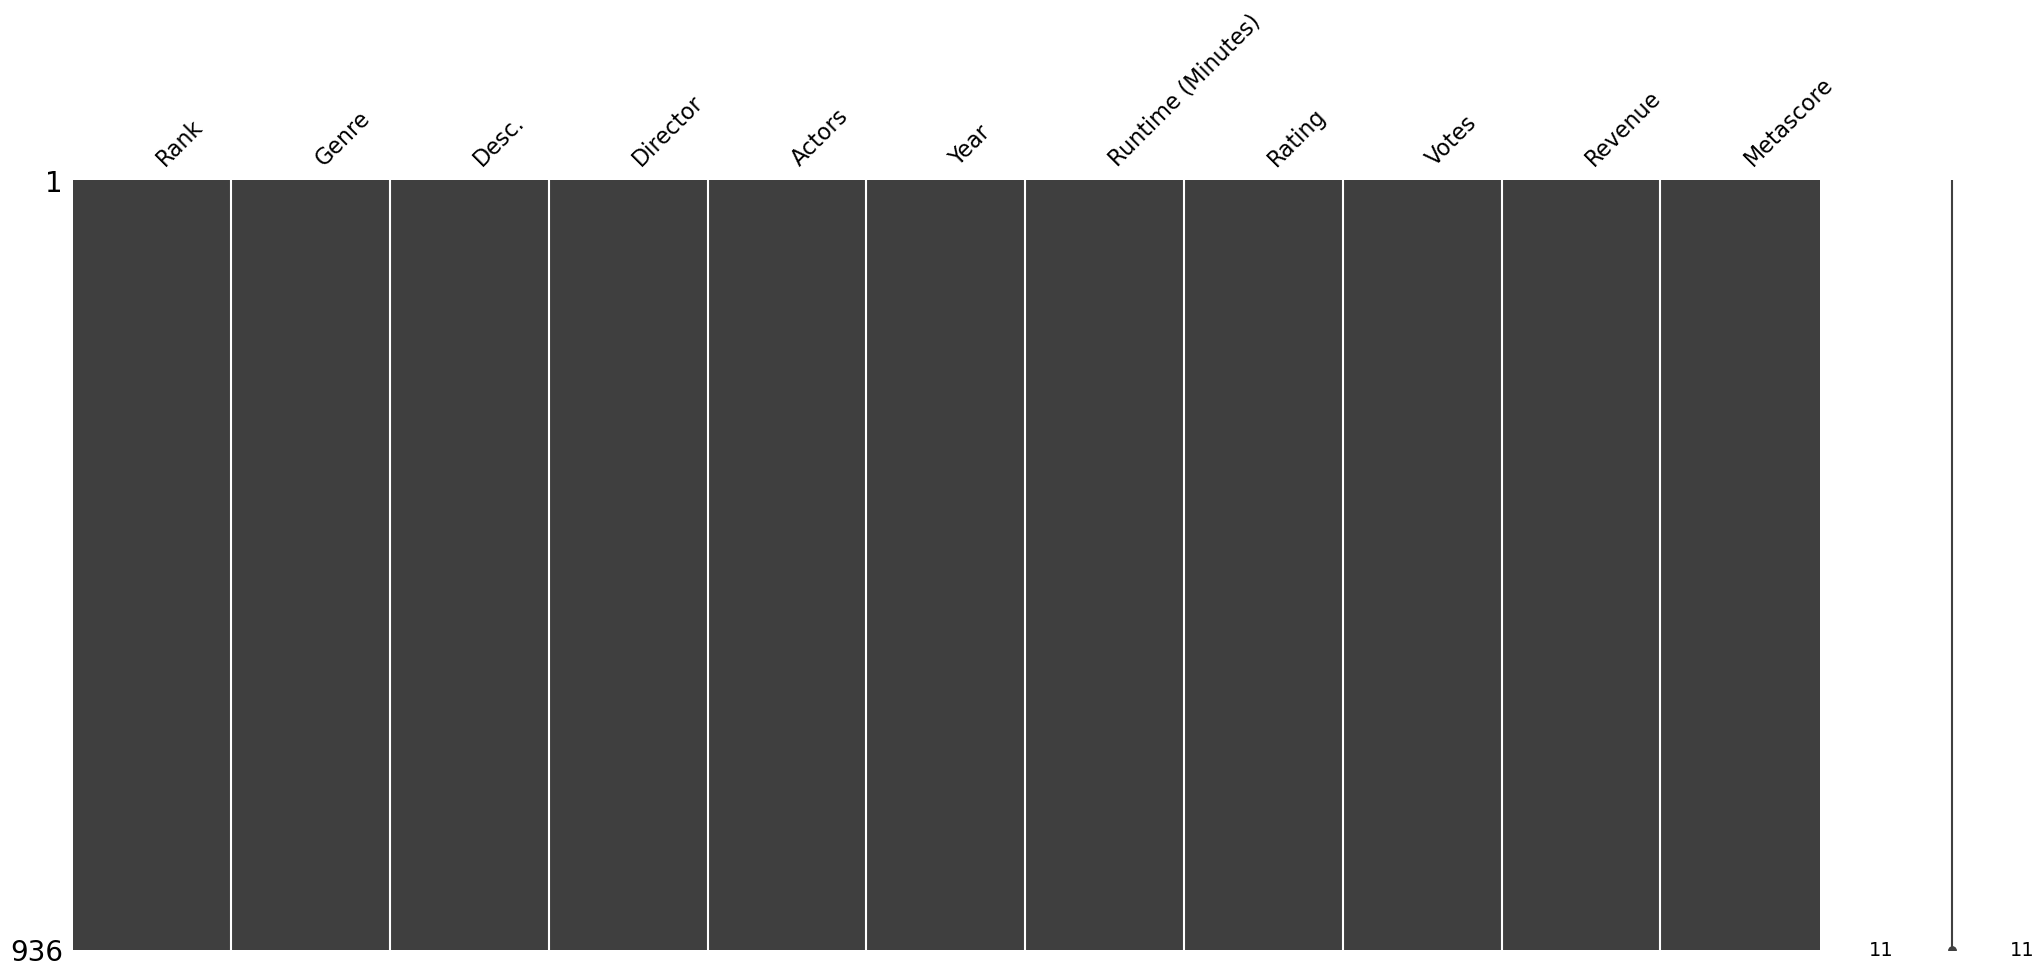

In [45]:
missingno.matrix(movie);

In [46]:
year_sta=movie.Year.value_counts().sort_index()
year_sta

2006     41
2007     46
2008     49
2009     49
2010     59
2011     58
2012     62
2013     86
2014     95
2015    123
2016    268
Name: Year, dtype: int64

In [47]:
year_sta.index

Int64Index([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype='int64')

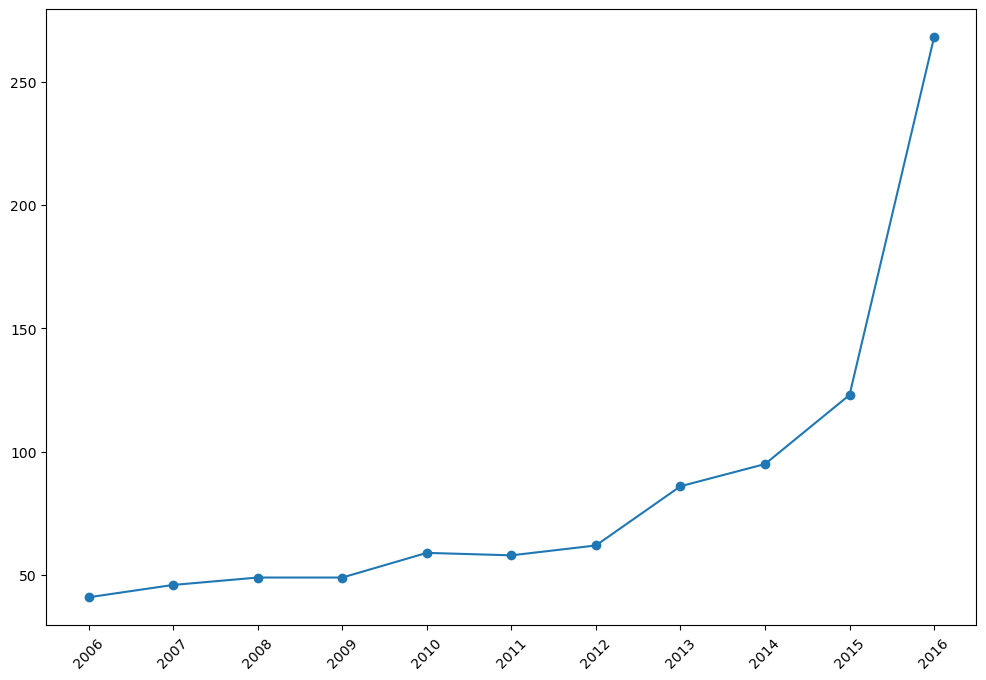

In [48]:
plt.figure(figsize=(12,8))
plt.plot(year_sta,marker="o")
plt.xticks(year_sta.index,rotation=45);

In [49]:
movie.groupby('Genre').Genre.count().sort_values(ascending=False).head(10)

Genre
Action,Adventure,Sci-Fi       50
Drama                         43
Comedy,Drama,Romance          32
Comedy                        30
Drama,Romance                 28
Action,Adventure,Fantasy      26
Animation,Adventure,Comedy    26
Comedy,Romance                25
Comedy,Drama                  25
Crime,Drama,Mystery           22
Name: Genre, dtype: int64

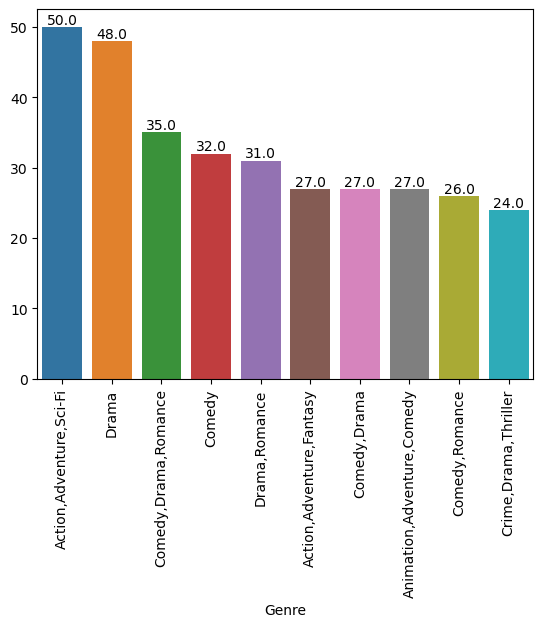

In [50]:
ax=sns.barplot(x=df.groupby('Genre').Genre.count().sort_values(ascending=False).head(10).index,y=df.groupby('Genre').Genre.count().sort_values(ascending=False).head(10).values)
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0], fmt='%.1f');

In [51]:
flatten = [j.strip() for i in df.Genre.values for j in i.split(',')]

In [52]:
len(flatten)

2555

In [53]:
Genre_uni=set(flatten)
Genre_uni

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western'}

In [54]:
len(Genre_uni)

20

In [55]:
single_type={i:flatten.count(i) for i in Genre_uni }
single_type

{'War': 13,
 'Romance': 141,
 'Adventure': 259,
 'Biography': 81,
 'Thriller': 195,
 'Family': 51,
 'Mystery': 106,
 'Sport': 18,
 'Animation': 49,
 'Comedy': 279,
 'Fantasy': 101,
 'Drama': 513,
 'Western': 7,
 'Musical': 5,
 'Horror': 119,
 'Music': 16,
 'Crime': 150,
 'Sci-Fi': 120,
 'History': 29,
 'Action': 303}

In [56]:
single_type= {k:v for k,v in sorted(single_type.items(),key=lambda item: item[1])}
single_type

{'Musical': 5,
 'Western': 7,
 'War': 13,
 'Music': 16,
 'Sport': 18,
 'History': 29,
 'Animation': 49,
 'Family': 51,
 'Biography': 81,
 'Fantasy': 101,
 'Mystery': 106,
 'Horror': 119,
 'Sci-Fi': 120,
 'Romance': 141,
 'Crime': 150,
 'Thriller': 195,
 'Adventure': 259,
 'Comedy': 279,
 'Action': 303,
 'Drama': 513}

In [57]:
most_produced_10 = {k:v for k,v in sorted(single_type.items(),key=lambda item: item[1],reverse=True)[:10]}
most_produced_10

{'Drama': 513,
 'Action': 303,
 'Comedy': 279,
 'Adventure': 259,
 'Thriller': 195,
 'Crime': 150,
 'Romance': 141,
 'Sci-Fi': 120,
 'Horror': 119,
 'Mystery': 106}

In [58]:
movie_style_labels = single_type.keys()
movie_style_labels

dict_keys(['Musical', 'Western', 'War', 'Music', 'Sport', 'History', 'Animation', 'Family', 'Biography', 'Fantasy', 'Mystery', 'Horror', 'Sci-Fi', 'Romance', 'Crime', 'Thriller', 'Adventure', 'Comedy', 'Action', 'Drama'])

In [59]:
plt.figure()
plt.pie([*list(single_type.values())[-6:],np.sum(list(single_type.values())[:-6])],labels=[*list(movie_style_labels)[-6:],"Others"],autopct="%.1f",
        explode=[0.2]*len([*list(single_type.values())[-6:],np.sum(list(single_type.values())[:-6])]),pctdistance=0.5,labeldistance=1.2,rotatelabels=0)
plt.legend(bbox_to_anchor=(-0.2,1,0,0))

In [60]:
fig = px.pie(values=single_type.values(), names=single_type.keys(), title='Numbers of Movie Style')
fig.show()

In [61]:
sns.heatmap(movie.corr(),annot=True)

/tmp/ipykernel_20/2512803623.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

In [62]:
actors=[i.split(',') for i in df.Actors.values]
actors

[['Chris Pratt', ' Vin Diesel', ' Bradley Cooper', ' Zoe Saldana'],
 ['Noomi Rapace',
  ' Logan Marshall-Green',
  ' Michael Fassbender',
  ' Charlize Theron'],
 ['James McAvoy', ' Anya Taylor-Joy', ' Haley Lu Richardson', ' Jessica Sula'],
 ['Matthew McConaughey',
  'Reese Witherspoon',
  ' Seth MacFarlane',
  ' Scarlett Johansson'],
 ['Will Smith', ' Jared Leto', ' Margot Robbie', ' Viola Davis'],
 ['Matt Damon', ' Tian Jing', ' Willem Dafoe', ' Andy Lau'],
 ['Ryan Gosling', ' Emma Stone', ' Rosemarie DeWitt', ' J.K. Simmons'],
 ['Essie Davis', ' Andrea Riseborough', ' Julian Barratt', 'Kenneth Branagh'],
 ['Charlie Hunnam', ' Robert Pattinson', ' Sienna Miller', ' Tom Holland'],
 ['Jennifer Lawrence', ' Chris Pratt', ' Michael Sheen', 'Laurence Fishburne'],
 ['Eddie Redmayne', ' Katherine Waterston', ' Alison Sudol', 'Dan Fogler'],
 ['Taraji P. Henson', ' Octavia Spencer', ' Janelle Monáe', 'Kevin Costner'],
 ['Felicity Jones', ' Diego Luna', ' Alan Tudyk', ' Donnie Yen'],
 ["Auli'i

In [63]:
flatten_actors=[j.strip() for i in actors for j in i]
flatten_actors

['Chris Pratt',
 'Vin Diesel',
 'Bradley Cooper',
 'Zoe Saldana',
 'Noomi Rapace',
 'Logan Marshall-Green',
 'Michael Fassbender',
 'Charlize Theron',
 'James McAvoy',
 'Anya Taylor-Joy',
 'Haley Lu Richardson',
 'Jessica Sula',
 'Matthew McConaughey',
 'Reese Witherspoon',
 'Seth MacFarlane',
 'Scarlett Johansson',
 'Will Smith',
 'Jared Leto',
 'Margot Robbie',
 'Viola Davis',
 'Matt Damon',
 'Tian Jing',
 'Willem Dafoe',
 'Andy Lau',
 'Ryan Gosling',
 'Emma Stone',
 'Rosemarie DeWitt',
 'J.K. Simmons',
 'Essie Davis',
 'Andrea Riseborough',
 'Julian Barratt',
 'Kenneth Branagh',
 'Charlie Hunnam',
 'Robert Pattinson',
 'Sienna Miller',
 'Tom Holland',
 'Jennifer Lawrence',
 'Chris Pratt',
 'Michael Sheen',
 'Laurence Fishburne',
 'Eddie Redmayne',
 'Katherine Waterston',
 'Alison Sudol',
 'Dan Fogler',
 'Taraji P. Henson',
 'Octavia Spencer',
 'Janelle Monáe',
 'Kevin Costner',
 'Felicity Jones',
 'Diego Luna',
 'Alan Tudyk',
 'Donnie Yen',
 "Auli'i Cravalho",
 'Dwayne Johnson',
 'R

In [64]:
len(flatten_actors)

3999

In [65]:
u_actors=set(flatten_actors)#Unique actor values
u_actors

{'Stephen Lang',
 'Sam Claflin',
 'Maribel Verdú',
 'Thandie Newton',
 'Seth Rogen',
 'Ian Holm',
 'Hunter McCracken',
 'Moises Arias',
 'Aaron Taylor-Johnson',
 'Sheila Kelley',
 'Kirby Bliss Blanton',
 'Julianne Hough',
 'Martin Henderson',
 'Bryan Greenberg',
 'Eloise Mumford',
 'Michael Chiklis',
 'Kerry Washington',
 'Lisa Thoreson',
 'Isaiah Stone',
 'Paul Giamatti',
 'Michael Dickson',
 'Jeremy Irons',
 'Natalie Martinez',
 'Mathieu Amalric',
 'Christoph Waltz',
 'Joshua Leonard',
 'Daniel Craig',
 'David Wenham',
 'Melissa McCarthy',
 'Carice van Houten',
 'Maria Dizzia',
 'Mia Goth',
 'Tim Pigott-Smith',
 'Devon Bostick',
 'Antonio Banderas',
 'Gabriella Wilde',
 'Anushka Sharma',
 'Rachel Korine',
 'Michele Valley',
 'Ice Cube',
 'David Spade',
 'Tim Allen',
 'Kristin Scott Thomas',
 'Steve Tom',
 'Daniel Henshall',
 'Tony Danza',
 'Jack Reynor',
 'McCaul Lombardi',
 'Rufus Sewell',
 'Maury Sterling',
 'Gemma Ward',
 'Mélissa Désormeaux-Poulin',
 'Dieter Laser',
 'Cara Delevi

In [66]:
len(u_actors)

1985

In [67]:
c_actors={i:flatten_actors.count(i) for i in u_actors}#that returns how many times an actor's name pass in Dataframe Actors column
c_actors

{'Stephen Lang': 2,
 'Sam Claflin': 4,
 'Maribel Verdú': 1,
 'Thandie Newton': 4,
 'Seth Rogen': 11,
 'Ian Holm': 1,
 'Hunter McCracken': 1,
 'Moises Arias': 1,
 'Aaron Taylor-Johnson': 6,
 'Sheila Kelley': 1,
 'Kirby Bliss Blanton': 1,
 'Julianne Hough': 3,
 'Martin Henderson': 2,
 'Bryan Greenberg': 1,
 'Eloise Mumford': 1,
 'Michael Chiklis': 2,
 'Kerry Washington': 1,
 'Lisa Thoreson': 1,
 'Isaiah Stone': 1,
 'Paul Giamatti': 3,
 'Michael Dickson': 1,
 'Jeremy Irons': 4,
 'Natalie Martinez': 1,
 'Mathieu Amalric': 2,
 'Christoph Waltz': 3,
 'Joshua Leonard': 1,
 'Daniel Craig': 6,
 'David Wenham': 1,
 'Melissa McCarthy': 4,
 'Carice van Houten': 1,
 'Maria Dizzia': 1,
 'Mia Goth': 2,
 'Tim Pigott-Smith': 1,
 'Devon Bostick': 2,
 'Antonio Banderas': 2,
 'Gabriella Wilde': 2,
 'Anushka Sharma': 1,
 'Rachel Korine': 1,
 'Michele Valley': 1,
 'Ice Cube': 3,
 'David Spade': 2,
 'Tim Allen': 1,
 'Kristin Scott Thomas': 1,
 'Steve Tom': 1,
 'Daniel Henshall': 1,
 'Tony Danza': 1,
 'Jack R

In [68]:
movie_role_count=pd.DataFrame({"actors":[*c_actors.keys()],"role count":[*c_actors.values()]}).sort_values(by="role count",ascending=False)
movie_role_count

actors  role count
1555      Mark Wahlberg          15
1603       Hugh Jackman          14
1740     Christian Bale          13
309           Brad Pitt          13
1569  Robert Downey Jr.          12
...                 ...         ...
1072     Lambert Wilson           1
1071         Edith Scob           1
409         Jung-woo Ha           1
1069      Sarah Paulson           1
1984      Leonard Nimoy           1

[1985 rows x 2 columns]

In [69]:
movie_role_count.head(20)

actors  role count
1555       Mark Wahlberg          15
1603        Hugh Jackman          14
1740      Christian Bale          13
309            Brad Pitt          13
1569   Robert Downey Jr.          12
1214       Anne Hathaway          12
240          Johnny Depp          12
311            Tom Hardy          12
747   Michael Fassbender          12
921   Scarlett Johansson          12
1343      Channing Tatum          12
1385  Chloë Grace Moretz          11
785        Gerard Butler          11
1355   Jennifer Lawrence          11
4             Seth Rogen          11
169        Anna Kendrick          11
540       Bradley Cooper          11
1935     Jake Gyllenhaal          11
936       Cate Blanchett          11
1681        Shia LaBeouf          11

In [70]:
movie_role_count.head(20)["role count"].values

array([15, 14, 13, 13, 12, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11,
       11, 11, 11])

In [71]:
plt.figure(figsize=(16,9))
sns.barplot(y=movie_role_count.head(20).actors.values,x=movie_role_count.head(20)["role count"].values)
plt.grid()
plt.xticks(range(16),rotation=0,fontsize=12)
plt.yticks(fontsize=10)
plt.title("Top 20 Roled Actors ",fontsize=20)
plt.xlabel("Number of Movies",fontsize=16)
plt.ylabel("Actors's Names",fontsize=16)
;

''

In [72]:
fig=px.scatter(top_250,x=top_250['Metascore'],y=top_250['Revenue'],title='Top 250 MOVIES')
fig.show()
